## Classwork 04212025

### 1. Plot the original data to observe its 2D distribution.

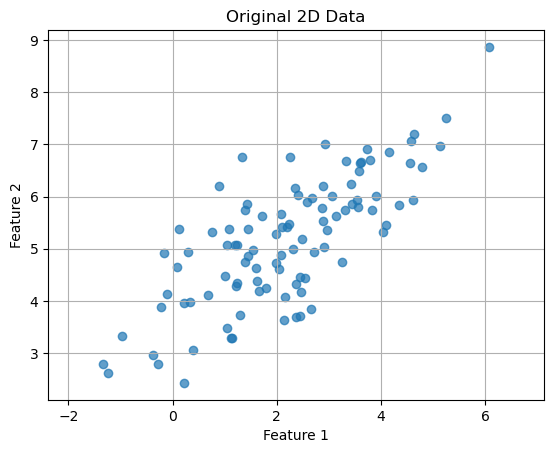

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)
# Step 2: Plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()


### 2. Center the data (subtract mean from each feature)

In [2]:
# Step 3: Center the data (Question 2)
X_centered = X - np.mean(X, axis=0)

# Print means to verify centering
print("Mean of original data:", np.mean(X, axis=0))
print("Mean of centered data:", np.mean(X_centered, axis=0))

Mean of original data: [2.18068065 5.16965257]
Mean of centered data: [2.66453526e-17 4.26325641e-16]


### 3. Compute the covariance matrix.

In [3]:
# Step 4: Compute the covariance matrix (Question 3)
cov_matrix = np.cov(X_centered, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[2.28165958 1.40082016]
 [1.40082016 1.50064765]]


### 4. Calculate the eigenvalues and eigenvectors.

In [4]:
# Step 5: Calculate eigenvalues and eigenvectors (Question 4)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display results
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [3.34538606 0.43692116]
Eigenvectors:
 [[ 0.79640776 -0.60476002]
 [ 0.60476002  0.79640776]]


### 5. Project the data onto the first principal component

In [5]:
# Step 6: Project the data onto the first principal component 

# First principal component is the eigenvector with the highest eigenvalue
# We get the index of the largest eigenvalue
pc1_index = np.argmax(eigenvalues)
pc1 = eigenvectors[:, pc1_index]

# Project the centered data onto PC1 using dot product
X_projected = X_centered.dot(pc1)

# Display first few projected values
print("Projected Data onto PC1 (1D):\n", X_projected[:5])


Projected Data onto PC1 (1D):
 [-1.30603963 -1.64324718  0.25564442 -3.62587129  0.75127862]


### 6. Plot the 1D projection and compare it with the original

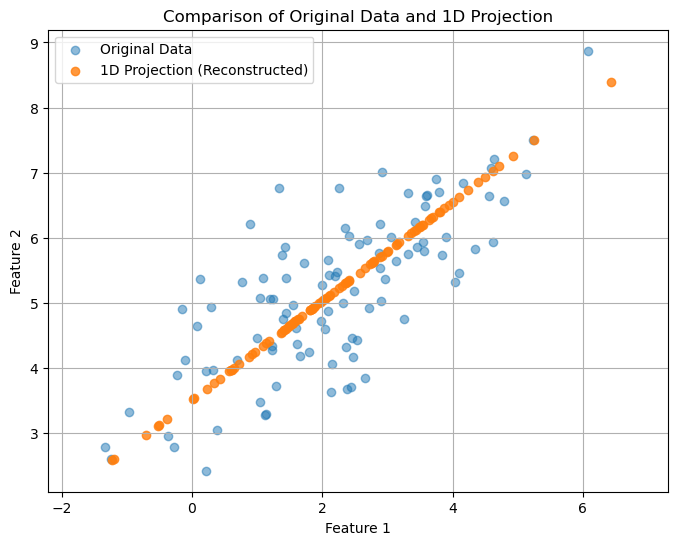

In [6]:
# Reconstruct the 1D projection back to 2D for visualization
# This gives us points along the PC1 direction only
X_reconstructed = np.outer(X_projected, pc1)

# Shift back to original space by adding the mean
X_reconstructed += np.mean(X, axis=0)

# Plot original 2D data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Original Data", alpha=0.5)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], label="1D Projection (Reconstructed)", alpha=0.8)
plt.title("Comparison of Original Data and 1D Projection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()


### 7. Plot the amount of variance explained by each component.

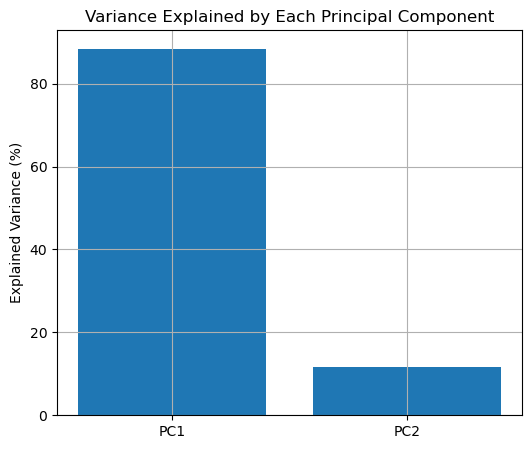

In [7]:
# Compute explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Plot the explained variance
plt.figure(figsize=(6, 5))
plt.bar(["PC1", "PC2"], explained_variance_ratio * 100)
plt.title("Variance Explained by Each Principal Component")
plt.ylabel("Explained Variance (%)")
plt.grid(True)
plt.show()


## Use t-SNE to visualize how it separates points from different classes in 2D space.
### 1.	Inspect the shape of X and y. What do the 64 features represent?


In [8]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
X = digits.data     # shape (1797, 64)
y = digits.target   # labels: 0–9

# Inspect shape
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1797, 64)
Shape of y: (1797,)


 X contains 1797 samples, each with 64 features.

 Each sample represents an 8x8 grayscale image of a handwritten digit (0–9).

The 64 features are pixel values from the flattened 8×8 image grid.

Each feature is a pixel intensity (0–16), where 0 = white, 16 = black.

### 2.	Apply TSNE from sklearn.manifold with n_components=2.

In [9]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Show shape of transformed data
print("Shape of X after t-SNE:", X_tsne.shape)


Shape of X after t-SNE: (1797, 2)


### 3.	Visualize the 2D t-SNE embedding using matplotlib.pyplot.scatter, color-coded by digit labels.

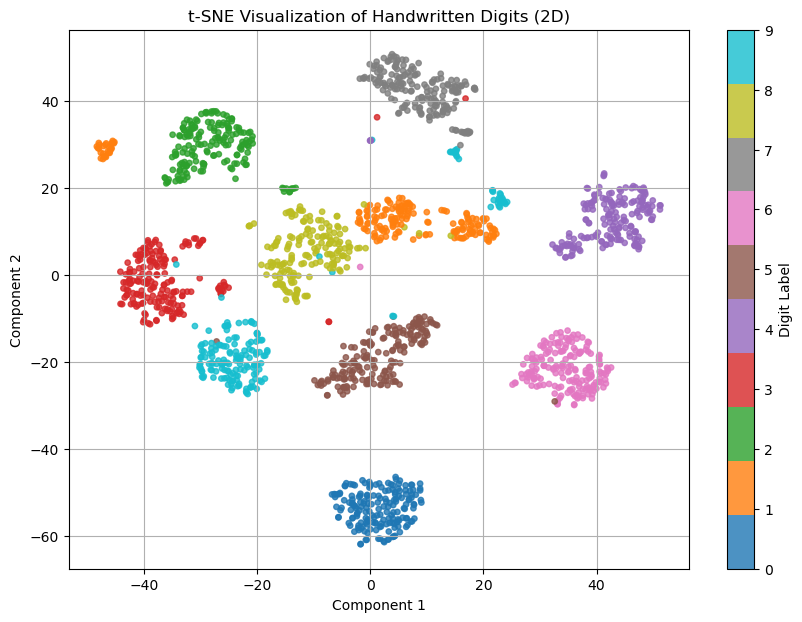

In [10]:
import matplotlib.pyplot as plt

# Plot the 2D t-SNE result
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=15, alpha=0.8)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.title("t-SNE Visualization of Handwritten Digits (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

### 4.	Try different perplexity values (e.g., 5, 30, 50) and compare how clusters change.

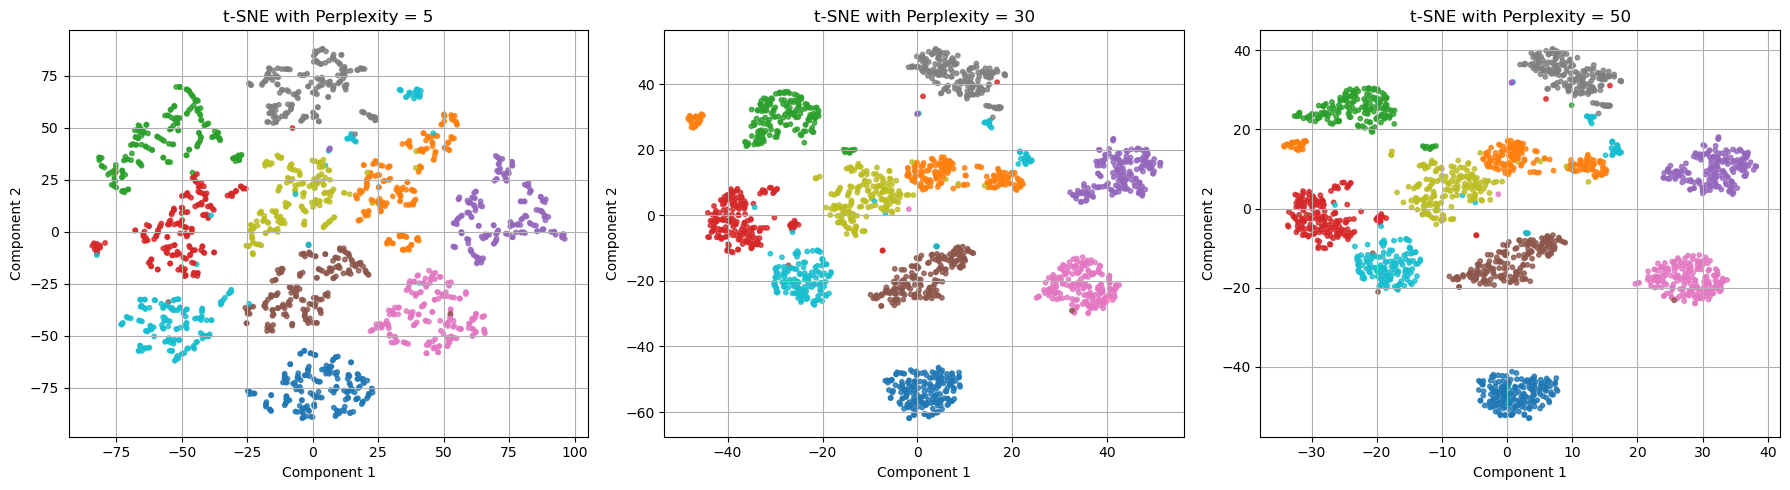

In [11]:
# List of perplexities to test
perplexities = [5, 30, 50]

# Create subplots
plt.figure(figsize=(18, 5))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    plt.subplot(1, 3, i+1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=10, alpha=0.8)
    plt.title(f"t-SNE with Perplexity = {perplexity}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)

plt.tight_layout()
plt.show()

Observation:

Perplexity = 5 → More compact, many tight clusters, but possibly noisy

Perplexity = 30 → Balanced clustering (usually a sweet spot)

Perplexity = 50 → Broader, smoother transitions between clusters